# El Viejo XOR: Métodos No-lineales para Problemas No-lineales

En esta sección, el objetivo es experimentar con modelos no lineales en el ambito del aprendizaje automático para problemas no lineales. Para esto se trabaja con un dataset famoso llamado XOR, el cual presenta problemas de clasificación linealmente inseparables. La idea es investigar las ideas generales para solucionar este tipo de problemas, diferenciando el poder de los clasificadores no lineales.

## A)

[[ 0.09762701  0.43037873]
 [ 0.20552675  0.08976637]
 [-0.1526904   0.29178823]
 ..., 
 [-0.14979966 -0.29409202]
 [-0.33397826  0.09037856]
 [-0.77174332 -0.6861918 ]]
[-1 -1  1 ...,  1 -1  1]


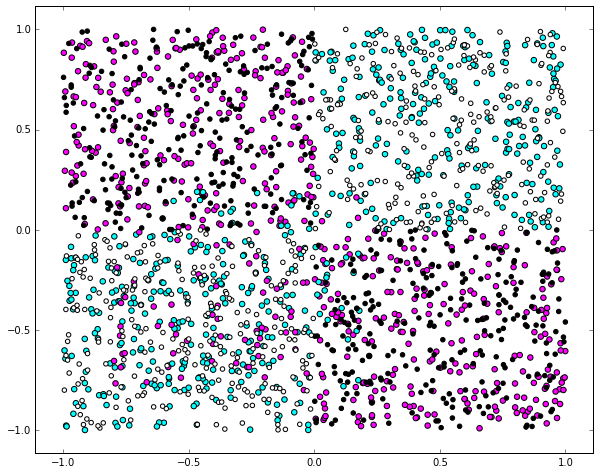

In [21]:
import numpy as np

def do_XOR(n=1000,noisy_n=100,svm=True):
    rng = np.random.RandomState(0)
    X_train = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_train = np.logical_xor(X_train[:,0] > 0, X_train[:,1] > 0)
    Y_train = 2*Y_train-1 if svm else Y_train
    X_noisy= rng.uniform(low=-0.8,high=0.2,size=(noisy_n,2))
    Y_noisy = -1*np.logical_xor(X_noisy[:,0] > 0, X_noisy[:,1] > 0) + 1
    Y_noisy = 2*Y_noisy-1 if svm else Y_noisy
    X_train = np.vstack((X_train, X_noisy))
    Y_train = np.hstack((Y_train, Y_noisy))
    X_test = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    Y_test = 2*Y_test - 1 if svm else Y_test
    return X_train,Y_train,X_test,Y_test

X_train,Y_train,X_test,Y_test = do_XOR()
print X_train
print Y_train

import matplotlib.pyplot as plt

f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(10,8))
axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
plt.axis('tight')
plt.show()


En primer lugar, se define una función que genera $n$ datos etiquetados para el problema XOR, generando el dataset a utilizar, definiendo el *training set* el cual posee un *noise* (ruido) que afectará en la clasificación del problema, además de definir el *test set* para evaluar los distintos clasificadores. Se generan $1000$ datos de entrenamiento y $1000$ datos de prueba, agregando un $10\%$ de ruido al dataset de entrenamiento para medir la tendencia del *overffiting*.  
Luego, se genera un gráfico que muestra la data de entrenamiento y de prueba, en el que se asigna distintos colores a las distintas clases a clasificar, en este caso, el color blanco y verde agua corresponde a los datos clasificados en la clase $0$, por otro lado el color negro y morado a la clase $1$. El conjunto de colores **morado** y **verde agua** corresponden al *training set*, los colores **negro** y **blanco** corresponden al *test set*.  

Como se puede observar, este gráfico muestra como se clasifican los datos que se encuentren entre los rangos $x_1 \in [-1,0]$, $x_2 \in [-1,0]$ o $x_1 \in [0,1]$, $x_2 \in [0,1]$ , corresponden a la clase $0$. Y los datos que se encuentren entre los rangos $x_1 \in [0,1]$, $x_2 \in [-1,0]$ o $x_1 \in [-1,0]$, $x_2 \in [0,1]$ corresponden a la clase $1$. Esto justamente representa un cambio de bit en multiplexores del tipo XOR, lo que le da el sentido al nombre del problema. Siendo el target(output) la salida de la operación XOR ($y = x_1 \oplus x_2$).  
Siendo el primer cuadrante cuando *x* e *y* son positivos ($1 \oplus 1$), el segundo cuadrante cuando *x* es negativo e *y* positivo ($0 \oplus 1$), el tercer cuadrante cuando *x* e *y* son negativos ($1 \oplus 1$), el cuarto cuadrante cuando *x* es positivo e *y* negativo ($0 \oplus 1).

## B)

In [43]:
import matplotlib.pyplot as plt

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-1:1:200j, -1:1:200j]
    if model_type == 'svm':
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'tree':
        #Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0 if model_type == 'svm' or model_type == 'tree' else Z > 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],levels=[-1, 0, 1])
    plt.show()

=========  ===================  ===============  ===========  ========
        C    Training accuracy    Test accuracy    Precision    Recall
=========  ===================  ===============  ===========  ========
   0.0001             0.512727            0.469     0.457831  0.48008
   0.001              0.513636            0.47      0.458753  0.481113
   0.01               0.517273            0.471     0.459677  0.482143
   0.1                0.517273            0.471     0.459677  0.482143
   1                  0.517273            0.471     0.459677  0.482143
  10                  0.517273            0.471     0.459677  0.482143
 100                  0.524545            0.479     0.467213  0.490234
1000                  0.436364            0.428     0.192593  0.46474
=========  ===================  ===============  ===========  ========
[[ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 ..., 
 [ True  Tr

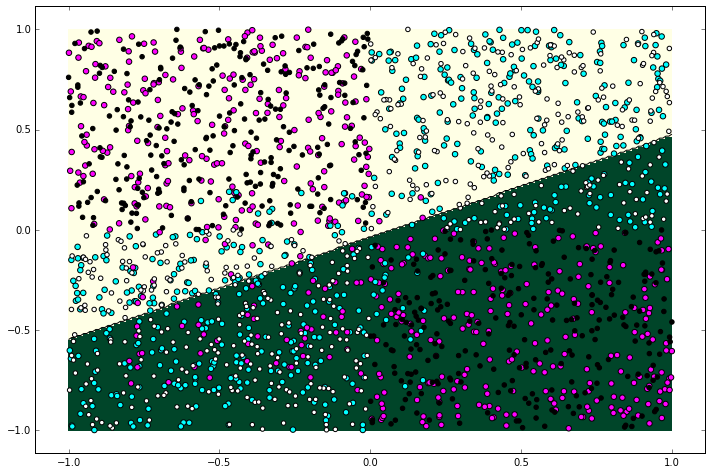

In [41]:
from sklearn.metrics import classification_report,precision_recall_fscore_support
from sklearn.svm import LinearSVC
info = []
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000]
#Cs = np.logspace(-3,2,base=10)
def do_LinearSVM(x,y,xt,yt):
    for C in Cs:
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        
        acc = model.score(x,y)
        acct = model.score(xt,yt)
        
        prec_rec = precision_recall_fscore_support(yt,model.predict(xt))[:1]
        datos = [C]+[acc,acct] + list(prec_rec[0])
        info.append(datos)
    return info

info = do_LinearSVM(X_train,Y_train,X_test,Y_test)
from tabulate import tabulate
print tabulate(info, headers=["C","Training accuracy","Test accuracy","Precision", "Recall"],  tablefmt="rst")

#graficar solo casos representativos
clf = LinearSVC(C=1000)
clf = clf.fit(X_train, Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

Como se puede observar en la representacion grafica, la *SVM Lineal* no resuelve satisfactoriamente el problema de clasificacion, ya que la separacion de clases es bastante debil y poco precisa. Es facil visualizar que gran parte de ambas clases quedan mezcladas, lo que corresponde aproximadamente a la mitad de los datos de cada clase. Esto se puede corroborar con la informacion presentada en la tabla confeccionada mas arriba, en la que el *test accuracy* varia entre 0.46 y 0.54, al variar el parametro $C$, el cual representa el grado de penalizacion. En otras palabras, esto significa que al momento de clasificar un nuevo dato, hay practicamente un $50\%$ de probabilidad de clasificarlo correctamente. 

## C)

[0.25, 0.5, 1, 2, 4, 8, 16]
Best Test Accuracy = 0.972000


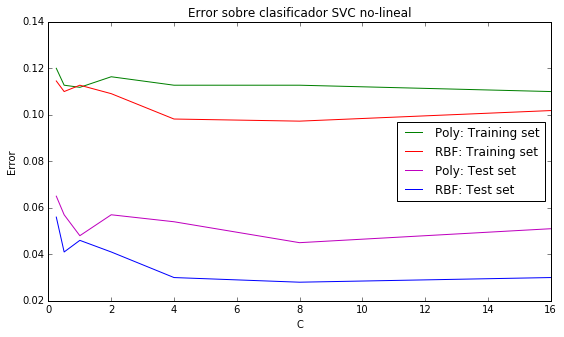

KERNEL POLY, C=1, DEGREE=2


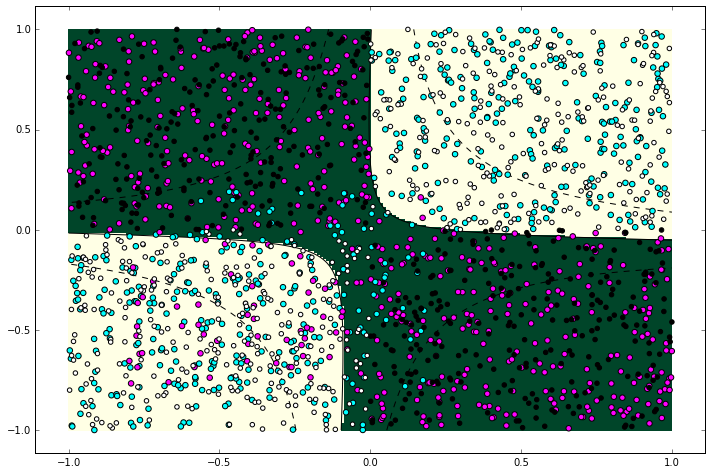

KERNEL RBF, C=1


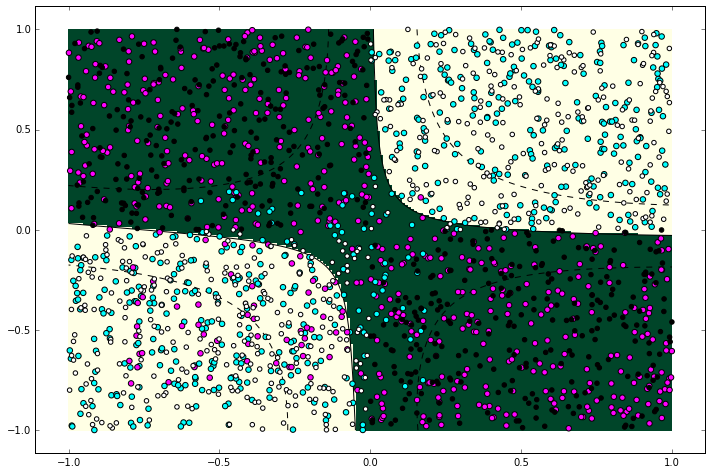

KERNEL RBF, C=4


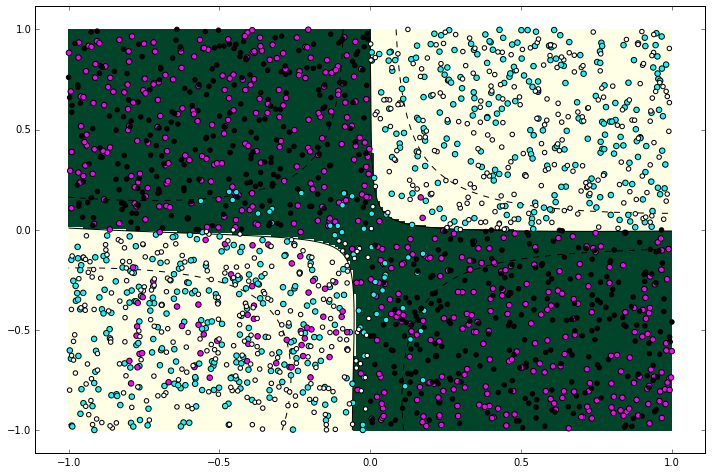

In [29]:
from sklearn.svm import SVC

Cs = [pow(2,k) for k in np.arange(-2,5,1)]
print Cs

def do_SVC(x,y,xt,yt):
    mejor = 0
    info1 = []
    info2 = []
    for C in Cs:
        clf1 = SVC(C=C, kernel="rbf")
        clf2 = SVC(C=C, kernel="poly",degree=2, coef0=1)
        
        clf1 = clf1.fit(x,y)
        clf2 = clf2.fit(x,y)
        
        acc_1 = clf1.score(x,y)
        acct_1 = clf1.score(xt,yt)
        
        acc_2 = clf2.score(x,y)
        acct_2 = clf2.score(xt,yt)
        
        if acct_1 > mejor:
            mejor = acct_1
        if acct_2 > mejor:
            mejor = acct_2
        info1.append([acc_1,acct_1])
        info2.append([acc_2,acct_2])
    print "Best Test Accuracy = %f"%mejor
    return info1,info2

info1, info2 = do_SVC(X_train,Y_train,X_test,Y_test)
error_train_1 = [ 1-i[0] for i in info1]
error_test_1 = [1-j[1] for j in info1]

error_train_2 = [ 1-i[0] for i in info2]
error_test_2 = [1-j[1] for j in info2]

import matplotlib.pyplot as plt
plt.subplots(figsize=(9,5))
plt.plot(Cs,error_train_2, label = "Poly: Training set", color = "g")
plt.plot(Cs,error_train_1, label = "RBF: Training set", color = "r")

plt.plot(Cs,error_test_2, label = "Poly: Test set", color = "m")
plt.plot(Cs,error_test_1, label = "RBF: Test set", color = "b")


#plt.xticks(Cs)
plt.xlabel('C')
plt.ylabel('Error')
plt.title('Error sobre clasificador SVC no-lineal')
#plt.axis('tight')
plt.legend(loc="center right")
plt.show()

#para casos representativos
print "KERNEL POLY, C=1, DEGREE=2"
clf = SVC(C=1, kernel="poly",degree=2, coef0=1)
clf = clf.fit(X_train,Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

print "KERNEL RBF, C=1"
clf = SVC(C=1, kernel="rbf")
clf = clf.fit(X_train,Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

print "KERNEL RBF, C=4"
clf = SVC(C=4, kernel="rbf")
clf = clf.fit(X_train,Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

Se puede ver que para distintos *kernel* el clasificador **SVM** entrega distintos resultados, visualizando esta diferencia en el gráfico del error anterior. Para el caso de un *kernel* polinomial ("*poly*") de grado 3, posee un mayor error que con un *kernel* multidimensional Gaussiano ("*rbf*"), esto es ya que el *kernel rbf* presenta para este problema un leve mayor poder dimensional para clasifiar correctamente, separando mejor las clases positivas de las negativas, visualizando en los gráficos anteriores de clasificación.

Se puede observar en la representacion grafica de la clasificacion de la **SVM** con *Kernel no lineal*, que la separacion entre clases esta mucho mejor lograda que en la *SVM lineal*, ya que visualmente en cada lado de la frontera predomina un color diferente asociado a cada clase, donde la zona oscura de la separación SVM corresponde a los asignados como 1 y la zona sin color (Fondo blanco) es asignado como 0. Los pequeños errores perceptibles se pueden observar en mayor medida en el centro de la representacion, ya que se produce una mezcla con una cantidad similar de datos de cada clase. Para la variación del hiperparámetro *C*, se puede ver que con un *C* mayor, el problema se restringe más al *training set*, esto se visualiza en los gráficos anteriores de clasificación, donde para un *C* igual a 4 el area en el centro es acotada, siendo mas pequeña ajustándose mejor al *training set*

## D) Red Neuronal de una neurona

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

n_h=1 #1 neurona

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
scores = model.evaluate(X_test, Y_test)
print "--"
print "Test Accuracy (activation sigmoid) = %f"%scores[1]

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
scores = model.evaluate(X_test, Y_test)
print "--"
print "Test Accuracy (activation relu) = %f"%scores[1]

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="softmax"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
scores = model.evaluate(X_test, Y_test)
print "--"
print "Test Accuracy (activation softmax) = %f"%scores[1]

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="linear"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
scores = model.evaluate(X_test, Y_test)
print "--"
print "Test Accuracy (activation linear) = %f"%scores[1]

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
scores = model.evaluate(X_test, Y_test)
print "--"
print "Test Accuracy (activation sigmoid, optimizer SGD lr = 0.1) = %f"%scores[1]

model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.add(Dense(n_h, init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="poisson", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
scores = model.evaluate(X_test, Y_test)
print "--"
print "Test Accuracy (activation relu, loss = poisson) = %f"%scores[1]

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="squared_hinge", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
scores = model.evaluate(X_test, Y_test)
print "--"
print "Test Accuracy (activation sigmoid, loss = squared_hinge) = %f"%scores[1]

 896/1000 [=========================>....] - ETA: 0s--
Test Accuracy (activation sigmoid) = 0.003000
 992/1000 [============================>.] - ETA: 0s--
Test Accuracy (activation relu) = 0.000000
 864/1000 [========================>.....] - ETA: 0s--
Test Accuracy (activation softmax) = 0.511000
 992/1000 [============================>.] - ETA: 0s--
Test Accuracy (activation linear) = 0.000000
 960/1000 [===========================>..] - ETA: 0s--
Test Accuracy (activation sigmoid, optimizer SGD lr = 0.1) = 0.000000
 768/1000 [======================>.......] - ETA: 0s--
Test Accuracy (activation relu, loss = poisson) = 0.000000
 544/1000 [===============>..............] - ETA: 0s --
Test Accuracy (activation sigmoid, loss = squared_hinge) = 0.132000


Softmax


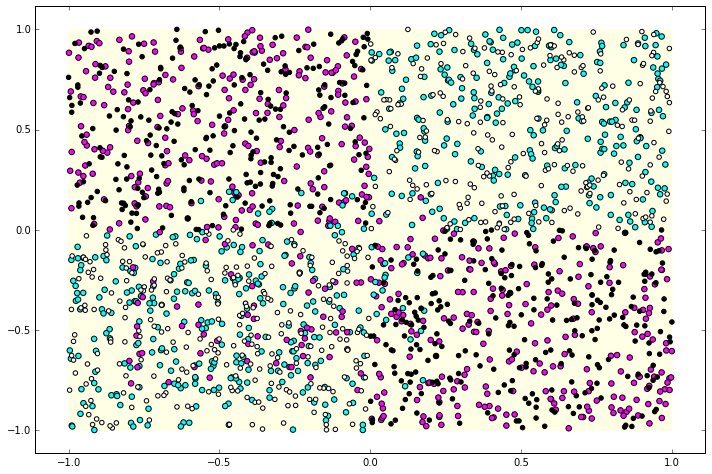

Sigmoid


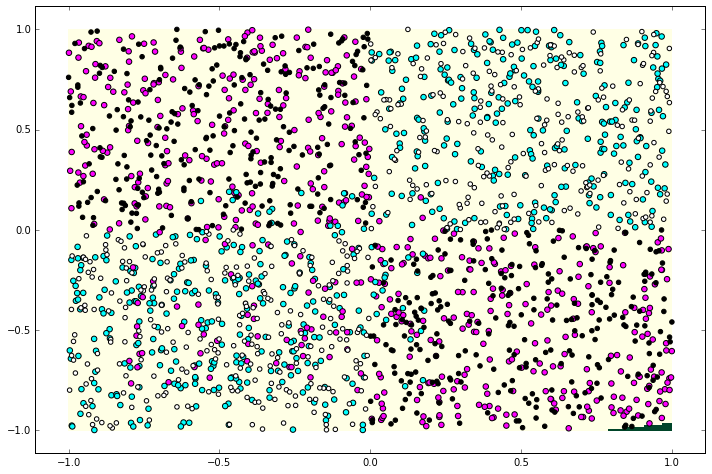

Sigmoid with loss squared hinge


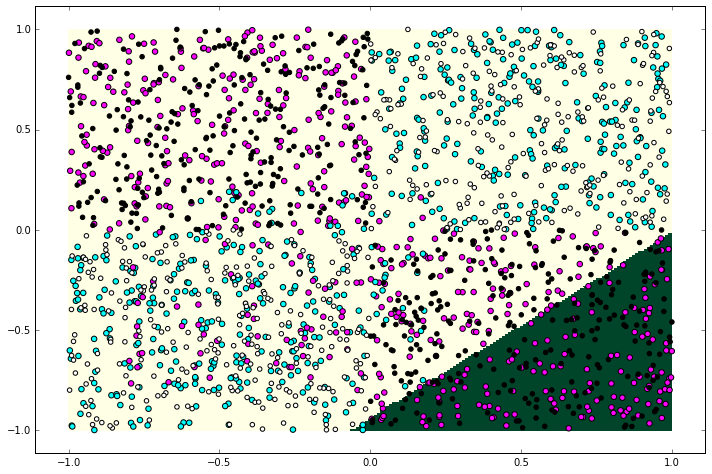

In [52]:
#para casos representativos
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="softmax"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
print "Softmax"
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
print "Sigmoid"
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="squared_hinge", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
print "Sigmoid with loss squared hinge"
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

Para los gráficos en que no se presenta la frontera con color verde oscuro es debido a que la red neuronal se ajusta llegando a predecir todos los datos como positivos o como negativos, entregando medida de desempeño alrededor del 50% debido a que esta clasificación es binaria por lo que el peor caso es clasificarlos a todos como una clase y tener un *acuraccy* alrededor del 50%.  
Para estos gráficos se puede ver que una red neuronal con una única neurona no logra clasificar el problema, debido a que los clasifica a todos como positivos o a todos como negativos, sin poder asignar fronteras visibles en los gráficos, esto es debido a que una red neuronal con una neurona no tiene las suficiente capacidad para clasificar un problema de este tipo que requiere un mayor procesamiento.

## E)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#alterar valores de los parametros en la red neuronal
N_hs = [pow(2,k) for k in np.arange(1,6,1)]
print N_hs
def do_ANN(x,y,xt,yt):
    mejor = 0
    info_train = []
    info_test = []
    for n in N_hs:
        model = Sequential()
        model.add(Dense(n, input_dim=x.shape[1], init="uniform", activation="relu"))
        model.add(Dense(1, init="uniform", activation="sigmoid"))
        model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
        model.fit(x, y, nb_epoch=50, batch_size=100, verbose=0)
        
        scores = model.evaluate(x, y)
        info_train.append(scores[1])
        scores = model.evaluate(xt, yt)
        info_test.append(scores[1])
        if scores[1] > mejor:
            mejor = scores[1]
    print "\n Test Accuracy = %f"%mejor
    return info_train,info_test

info_tr,info_ts = do_ANN(X_train,Y_train,X_test,Y_test)

[2, 4, 8, 16, 32]
 544/1000 [===============>..............] - ETA: 0s
 Test Accuracy = 0.460000


En la celda anterior se ajustan distintos modelos para una red neuronal de una capa esconcida, variando la cantidad de las neuronas en esa capa y mostrándo graficamente a continuación.

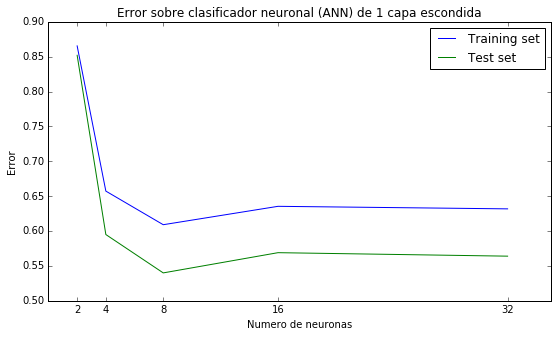

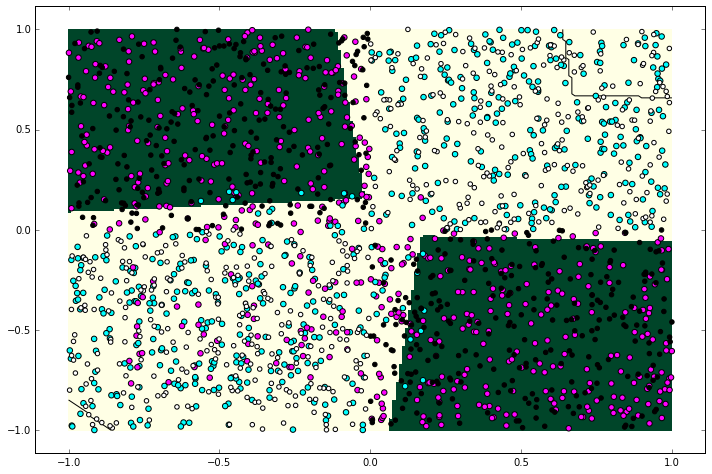

In [55]:
error_train = [1-i for i in info_tr]
error_test = [1-j for j in info_ts]

import matplotlib.pyplot as plt
plt.subplots(figsize=(9,5))
plt.plot(N_hs,error_train, label = "Training set")
plt.plot(N_hs,error_test, label = "Test set")

plt.xticks(N_hs)
plt.xlabel('Numero de neuronas')
plt.ylabel('Error')
plt.title('Error sobre clasificador neuronal (ANN) de 1 capa escondida')
#plt.axis('tight')
plt.legend(loc="upper right")
plt.show()

#para casos representativos
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

## F)

==============  ==========
Config            Accuracy
==============  ==========
Gini-best            0.489
Entropy-best         0.486
Gini-random          0.491
Entropy-random       0.491
==============  ==========


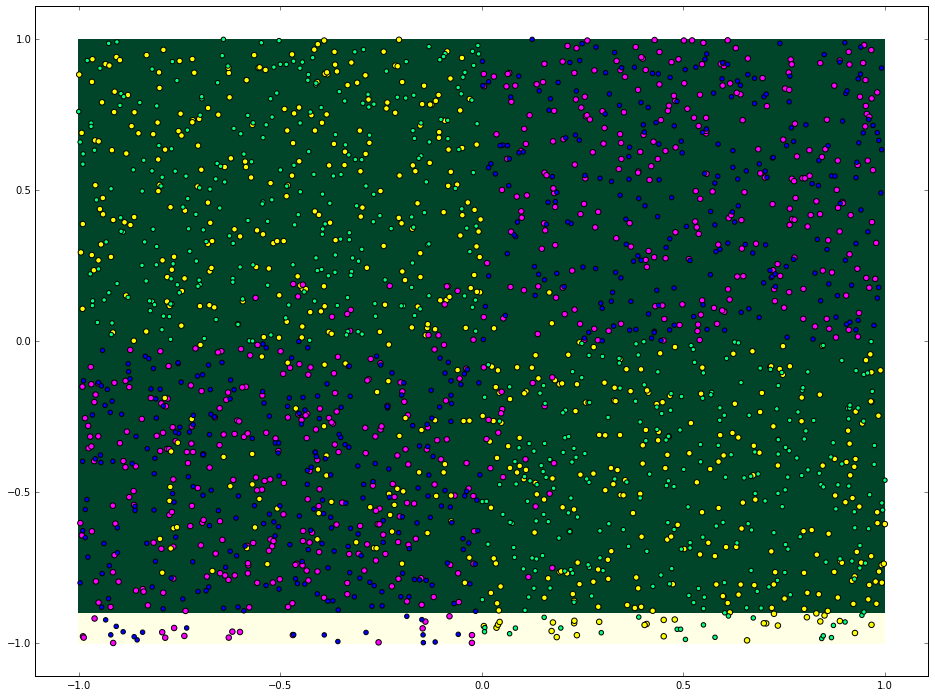

In [110]:
from sklearn.tree import DecisionTreeClassifier as Tree

acc = []
clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
acc.append(acc_test)

clf=Tree(criterion="entropy",splitter="best",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
acc.append(acc_test)

clf=Tree(criterion="gini",splitter="random",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
acc.append(acc_test)

clf=Tree(criterion="entropy",splitter="random",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
acc.append(acc_test)

names = ["Gini-best", "Entropy-best", "Gini-random", "Entropy-random"]
table = zip(*[names,acc])
from tabulate import tabulate
print tabulate(table, headers=["Config","Accuracy"],  tablefmt="rst")


#print clf.tree_.max_depth

#para casos representativos
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

Se puede observar en la representacion grafica de la clasificacion, que *stump* no resuelve satisfactoriamente el problema, ya que practicamente no realiza una separacion entre clases, dejando aproximadamente el $98\%$ de los datos en una clase y el resto en otra, produciendose mezcla de clases en ambos lados.
Al modificar las metricas de *criterion* entre los valores ''gini'' y ''entropy'' y *splitter* entre los valores ''best'' y ''random'' se obtienen distintos valores para el *accuracy*, los que se resumen en la tabla de mas arriba.
En esta tabla se puede ver que al setear la metrica *splitter* en *random*, se produce el mismo *accuracy* tanto en *gini* como con *entropy*, pero si se setea *splitter* como *best*, se obtiene una leve mejora en el *accuracy* con *gini*.

[Quizas meter aca mas materia]

## G)

Best Test Accuracy = 0.990000


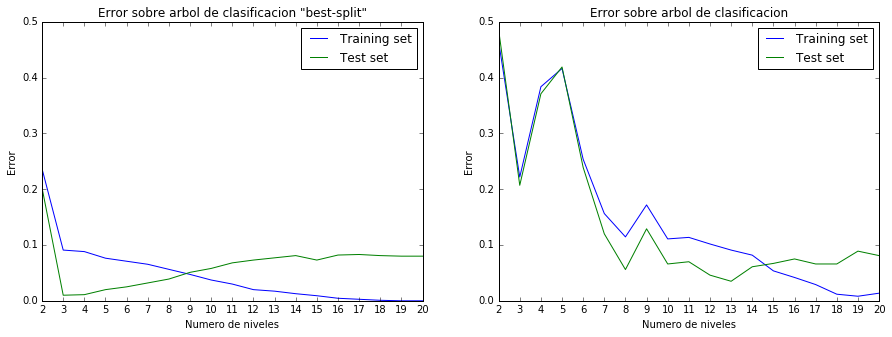

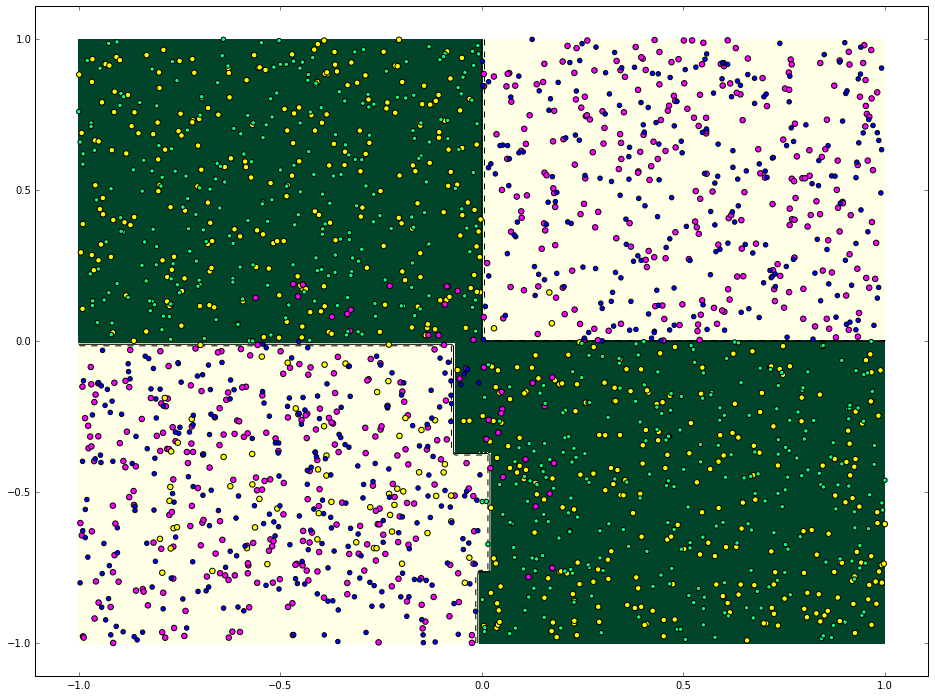

In [12]:
from sklearn.tree import DecisionTreeClassifier as Tree

N_ts = np.arange(2,21,1)
def do_Tree(x,y,xt,yt):
    mejor = 0
    info_1 = []
    info_2 = []
    for n_t in N_ts:
        clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=n_t)
        clf.fit(x,y)
        acc = clf.score(x,y)
        acc_t = clf.score(xt,yt)
        if acc_t > mejor:
            mejor = acc_t
        info_1.append([acc,acc_t])
        
        clf=Tree(criterion="gini",splitter="random",random_state=0,max_depth=n_t)
        clf.fit(x,y)
        acc = clf.score(x,y)
        acc_t = clf.score(xt,yt)
        if acc_t > mejor:
            mejor = acc_t
        info_2.append([acc,acc_t])
    print "Best Test Accuracy = %f"%mejor
    return info_1,info_2

info1,info2 = do_Tree(X_train,Y_train,X_test,Y_test)
error_train = [ 1-i[0] for i in info1]
error_test = [1-j[1] for j in info1]
error_train2 = [ 1-i[0] for i in info2]
error_test2 = [1-j[1] for j in info2]

import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 2, figsize=(15,5))
axarr[0].plot(N_ts,error_train, label = "Training set")
axarr[0].plot(N_ts,error_test, label = "Test set")
axarr[0].set_xticks(N_ts)
axarr[0].set_xlabel('Numero de niveles')
axarr[0].set_ylabel('Error')
axarr[0].set_title('Error sobre arbol de clasificacion "best-split"')
axarr[0].set_ylim(0,0.5)
axarr[0].legend(loc="upper right")

axarr[1].plot(N_ts,error_train2, label = "Training set")
axarr[1].plot(N_ts,error_test2, label = "Test set")
axarr[1].set_xticks(N_ts)
axarr[1].set_xlabel('Numero de niveles')
axarr[1].set_ylabel('Error')
axarr[1].set_title('Error sobre arbol de clasificacion')
axarr[1].legend(loc="upper right")
plt.show()

#para casos representativos
clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=4)
clf.fit(X_train,Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

En esta seccion se trabajan con modelos de clasificacion *Random Forest*, es decir, con modelos de arbol iguales a los anteriores pero con la diferencia de que se acepten multiples niveles. Para estudiar el efecto de los multiples niveles se confeccionan dos graficos de error versus numero de niveles, en el que cada uno posee un modelo de arbol con la metrica *criterion* seteada en ''gini'', y se muestra la diferencia que existe entre setear la metrica ''splitter'' en ''best'' y ''random'' respectivamente.
En el primer grafico, que usa el ''best-split'' se puede observar que a mayor nivel de profundidad del arbol, en un principio tiende a disminuir bruscamente el error, pero a partir del nivel 3, el error de entrenamiento y el de test comienzan a comportarse de manera inversa, es decir, el error de test comienza a aumentar gradualmente hasta alcanzar un valor constante de aproximadamente 0.1 y el error de entrenamiento comienza a disminuir de la misma forma, partiendo aproximadamente de 0.1 y bajando de igual forma hasta tener error nulo.

En el segundo grafico, que usa el ''random-split'' se puede observar que a medida que se aumenta el numero de niveles, el error en un principio decae bruscamente, pero que a partir del nivel 3 empieza a tener un comportamiento oscilante, es decir, el error empieza a subir y bajar, pero cada vez en menor grado, lo que se traduce en oscilaciones cada vez mas pequeñas.

En la representacion grafica de la clasificacion realizada por *RandomForest* con 4 niveles de profundidad, se puede observar que se resuelve satisfactoriamente el problema de separacion de clases, ya que cada lado de la frontera generada contiene mayoritariamente la clase respectiva.
Esta forma de clasificacion es similar a la generada por los modelos ''SVM'' (y neurona(?)), pero con una forma mas ajustada en la seccion central, lo que produce un incremento significativo en la calidad de la clasificacion.